# Recommending a Data Science Area of specialization for an Edtech

Our goal in this project is to use [<font color=red> ** Data Science Stack Exchange** </font>](https://datascience.stackexchange.com/website) to evaluate what content a Data Science education company should create based on interest by subject

## Stack Exchange Website

<font color=blue>** What Kind of Questions Are Welcome on This Site? **</font><br> Exploring the help center section on question of the DSSE, questions to be asked should conform to the following:<br>
- Avoid subjective questions
- Ask practical questions
- Questions should be specific
- Questions should be constructive benefitting others


<font color=blue> What, other than questions, does the site's home subdivide into?</font><br>
Exploring the home page of DSSE, the home is subdivided into:<br>
- Questions (a list of all question asked)
- Tags ( refers to the category or label for classifying the questions asked)
- Users ( a list of all users)
- Unanswered ( a list of all unanswered questions)<br>
The Tags section particularly looks interesting as it offers quantitive insight into numbers questions per each subject in data science



<font color=blue> What information is available in each post?</font><br> It was examined for posts:
- both questions and answers had:

 - post title
 - post author
 - post body
 - post score

- for questions only, had:
 - question tag
 - how many users have the question on their watchers
 - number of views for the question
 - related questions
 - the last time the question was active

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

data_questions = pd.read_csv('2019_questions.csv')


In [2]:
data_questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


# Exploring the Data

In [3]:
data_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


Convert the ** "CreationDate" ** column to datetime data type.

In [4]:
data_questions['CreationDate'] = pd.to_datetime(data_questions.CreationDate)


All columns except ** "FavoriteCount" ** do not have missing values. We will replace the missing values with 0. 

In [5]:
data_questions.FavoriteCount.fillna(0,inplace=True)
data_questions['FavoriteCount'] = data_questions.FavoriteCount.astype(int)

In [6]:
# clean the 'Tags' column

data_questions['Tags'] = data_questions['Tags'].str.replace(
    r'^<|>$', '').str.split('><')

data_questions.Tags.head()

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

In [7]:
%matplotlib inline

# Most Used and Most Viewed Tags.

We now focus on determining the most popular tags. We'll do so by condiering two different popularity proxies: for each tag we'll count how many times the tag was used and how many times a question with tag was viewed.

### Most Used Tags

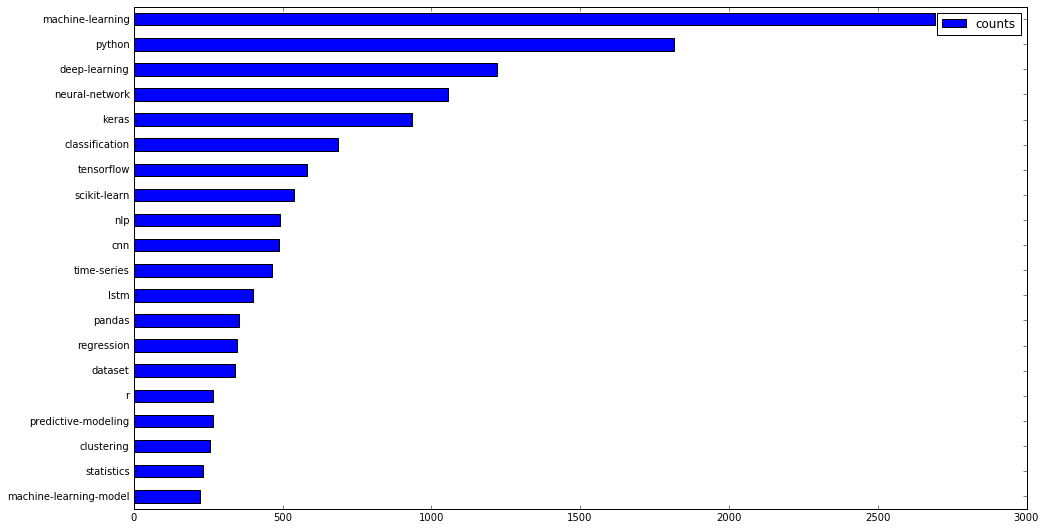

In [8]:
t_count = {}

for i in data_questions.Tags:
    for val in i:
        t_count[val] = t_count.get(val,0)+1 

t_df = pd.DataFrame(list(t_count.items()),
                    columns=['category','counts'])

# plot the barh chart of 20 most popular Data categories by Tags
most_used = t_df.sort_values('counts',ascending=False).set_index('category'
                                                       ).head(
    20).sort_values('counts')

del most_used.index.name  # remove the index name


most_used.plot(kind='barh',figsize=(16,9))

In [9]:
# from Ipython.display import HTML
# from Ipython.display import display

# code_body = """"
# # alternative code to the above code.

# tag_count = {}
# for r in data_questions['Tags']:
#     for item in r:
#         if item in tag_count:
#             tag_count[item] = tag_count[item] + 1
#         else:
#             tag_count[item] = 1

# tag_ = pd.DataFrame.from_dict(tag_count, orient='index')
# # tag_.rename({0:'count'}, axis=1, inplace=True)

# """
# h = HTML(code_body)
# display(h)

# print("click show code to display it")

### Most Viewed Tags using the 'viewcount' column

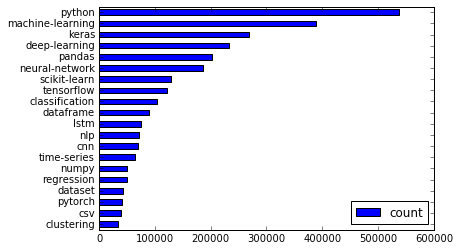

In [10]:
tag_viewcount = {}

for a,b in data_questions.iterrows():
    for val in b['Tags']:
        tag_viewcount[val] = tag_viewcount.get(
            val,0)+b['ViewCount']
            
tag_view = pd.DataFrame.from_dict(
    tag_viewcount, orient='index') # cnvert tag_viewcount to dataframe


tag_view.rename({0:'count'}, axis = 'columns', inplace=True)
tag_view.sort_values('count', inplace=True)

most_viewed = tag_view.tail(20)

# plot the top tags by view_count

most_viewed.plot.barh()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef0381898>],
      dtype=object)

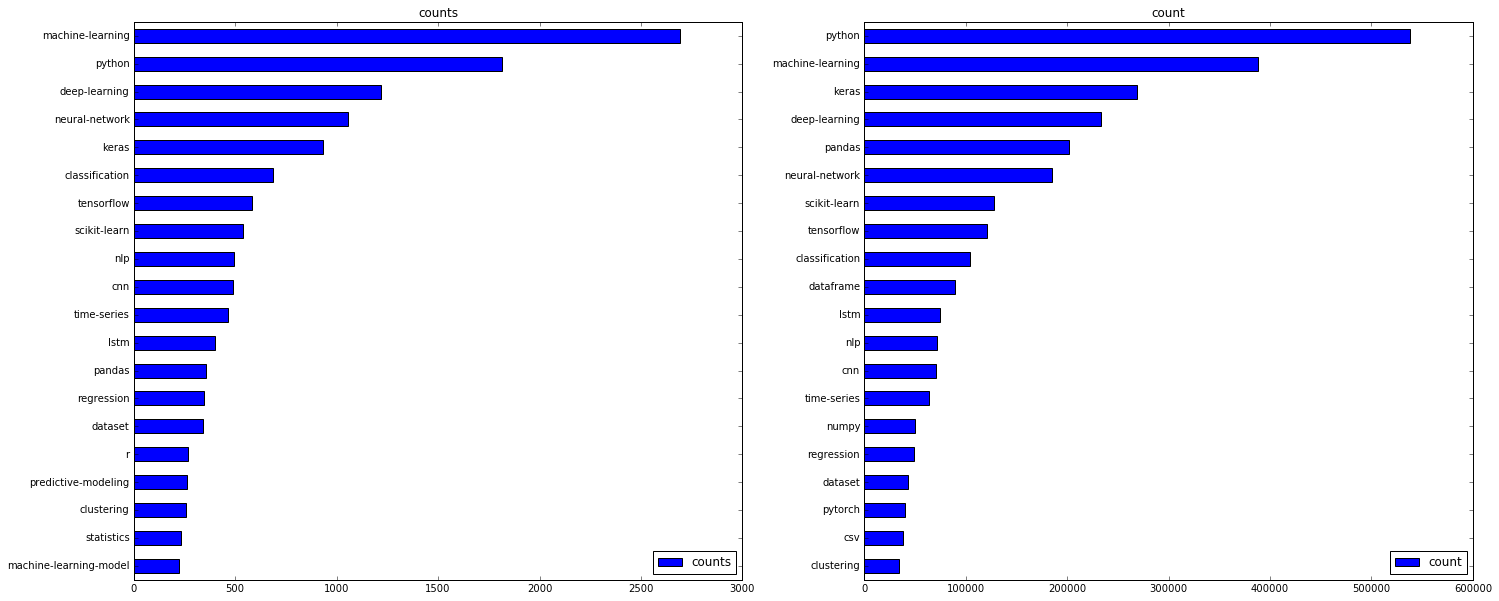

In [11]:
# visualization the top  tags by number of tags and viewcount side by side
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24,10))

most_used.plot(kind='barh',ax=ax1,subplots=True)

most_viewed.plot(kind='barh', ax=ax2, subplots=True)

# Relations Between Tags

From the visualization above, we can see that most top tags are present  in both dataframes.
Let's examine what tags are in ** most_used ** i.e most used tags but not in ** most_viewed ** i.e most viewed tags.

In [12]:
in_used = pd.merge(most_used, most_viewed, how='left', 
                   left_index=True, right_index=True)

in_used

,counts,count
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


In [13]:
in_viewed = pd.merge(most_used,most_viewed, how='right',left_index=True, 
                     right_index=True)
in_viewed

,counts,count
clustering,257.0,33928
csv,NaN,38654
pytorch,NaN,40240
dataset,340.0,43151
regression,347.0,49451
numpy,NaN,49767
time-series,466.0,64134
cnn,489.0,70349
nlp,493.0,71382
lstm,402.0,74458


The tags present in most_used and not present in most_viewed are:
- machine-learning-model
- statistics
- predictive-modeling
- r

and the tags present in most_viewed and not present in most_used are:
- csv
- pytorch
- numpy 
- dataframe

Additionally some tags stand out as being related. For example, *python* is related to *pandas* because pandas is a python library. So by writing about pandas, we can actually simultaneously tackle two tags.

Other pairs of tags, shouldn't be related at all like *pandas* and *r*

In [14]:
data_questions[data_questions['Tags'].apply(
    lambda tags: True if 'r' in tags and 'pandas' in tags else False)]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2873,60074,2019-09-11 20:35:17,0,22,"[r, pandas, dplyr]",0,0
3651,49148,2019-04-11 19:41:39,1,83,"[r, data-mining, pandas, matlab, databases]",3,0


Examining the Id of the data_question above and cross referencing it with the post on https://datascience.stackexchange.com/questions/ID, the question is question ID 49148 is more about DBMS i.e Database Management System rather than pandas and r

## Finding Relationships between pairs of Tags.

To find find relationship between pairs of Tags, we will used most_used tags as reference since most of the tags used are present in both most_used and most_viewed

In [15]:
tags_list = list(t_df.category)
tags_list

relationship_tags = pd.DataFrame(columns=tags_list, index=tags_list)
relationship_tags.fillna(0,inplace=True)
relationship_tags

,historgram,plotting,algorithms,dataset,aws-lambda,ngrams,labels,marketing,arima,svr,...,pgm,indexing,image-size,allennlp,torch,supervised-learning,colab,domain-adaptation,dataframe,probability-calibration
historgram,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
plotting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
algorithms,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dataset,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aws-lambda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ngrams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
labels,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
marketing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
arima,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
svr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# add the number of times each tag occur with anther tag to the relationship_tags df

for item in data_questions['Tags']:
    relationship_tags.loc[item, item] += 1
    
relationship_tags
    
most_used_associations = relationship_tags.loc[
    most_used.index, most_used.index]

most_used_associations

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


It is difficult for the human to check throught each data point in the most_used_associations and note the tag pairs with the highest numbers. 

To help us achieve this, we will use **seaborn** visualization method sns.heatmatp()

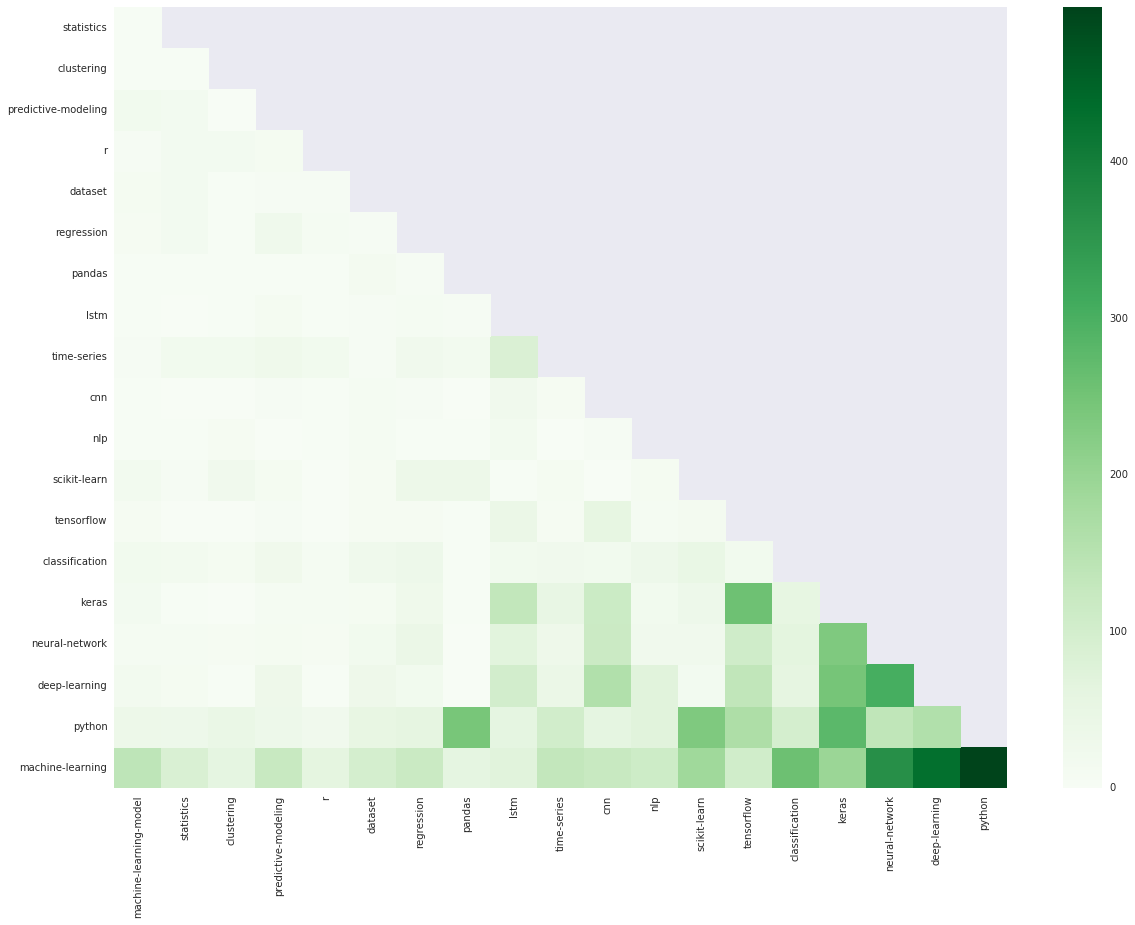

In [17]:
import seaborn as sns
import numpy as np

# remove the top row and last column thus removing repeated values during visualization
# create a mask to avoid repeated values, thus making the plot easier the read

for i in range(most_used_associations.shape[0]):
    most_used_associations.iloc[i,i] = pd.np.NaN  # this piece of code prevents this value from skewing the color density
    

most_used_associations = most_used_associations.iloc[1:, :-1]
mask = np.triu(np.ones_like(most_used_associations),k=1)

# the mask is used to isolate repeated values in our df for ease of visualization

plt.figure(figsize=(20,14))
sns.heatmap(most_used_associations, annot=False, mask=mask,
            cbar=True,cmap='Greens')

plt.show()

The most used tags - python, machine learning, deep learning, neural network,  keras appear to have strong corelationship as evidence by the dark green color.

However, it should be noted that correlation does not infer causability , that is increasing the content in one of the tags may not lead to active engagement by potential data enthusiasts.

Secondly, the visualization above only takes into consideration relationship between a pair of tags and not multiple tags. For example, it is possible that statistics and classification , together have strong effect on machine learning and not when considered separately.

# Domain Knowledge

Scikit-learn, keras, tensorflow are python libraries that allow data scientists to perform deep-learning ( a type of neural network)

Most of the top tags are related to one central machine learning theme - deep learning. We can suggest creation of python content that uses deep learning for classification problems ( and other variation of this).

# Just a Fad?

Before we officially make our recommendation, it would be nice  to solidify our findings with additional proof. More specifically, one thing that comes to mind is " is deep learning just a fad?".

To do this we will analyse all quesions in the posts table of Data science stack exchange. We will:

* Count how many deep learning questions are asked per time period
* The total amount of questions per time period
* How many deep learning questions there are relative to the total amount of questions per time period

In [18]:
all_questions = pd.read_csv('all_questions.csv')
all_questions['Tags']= all_questions.Tags.str.replace(r'^<|>$',''
                                                     ).str.split('><')
all_questions['CreationDate'] = pd.to_datetime(all_questions.CreationDate)

all_questions

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."
5,45428,2019-02-12 05:43:18,[cnn]
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]"
7,45431,2019-02-12 07:26:56,[machine-learning]
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]"
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]"


Since the field of Data Science remains fairly unchanged over some couple of months, we will track the deep learning questions on quarterly basis.

Any tag that is a member of this list ['keras', 'scikit-learn', 'tensorflow', 'cnn', 'lstm', 'deep-learning', 'neural-network'] will be classified as belonging to deep learning.

The list was arrived by examining the heat map visualization and checking tags related to deep learning.

In [19]:
deep_learning = ['scikit-learn','keras','cnn', 'lstm','deep-learning',
                'neural-network','tensorflow']

all_questions['DeepLearning'] = all_questions['Tags'].apply(
    lambda tag: 1 if any(x in deep_learning for x in tag) else 0)

all_questions

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1


Since we don't have complete data for the 1st quarter in year 2020, we will exclude questions from 2020 from the dataset

In [20]:
before_2020 = all_questions.copy()[
    all_questions['CreationDate'].dt.year < 2020]

before_2020

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1


Create column identifying which quarter a question belongs to

In [23]:
def class_quarter(yr):
    year = str(yr.year)[-2:]
    month = str(((yr.month-1) // 3)+1)
    
    return '{}Q{}'.format(year,month)

before_2020['Quarter'] = before_2020['CreationDate'].apply(class_quarter)

before_2020

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1
5,45428,2019-02-12 05:43:18,[cnn],1,19Q1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0,19Q1
7,45431,2019-02-12 07:26:56,[machine-learning],0,19Q1
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1,19Q1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1,19Q1


In [33]:
quarterly_group = before_2020.pivot_table(
    index='Quarter',values='DeepLearning', aggfunc = [np.sum,np.size])

quarterly_group = pd.DataFrame(quarterly_group)
quarterly_group.columns = ['DeepLearningQuestions','TotalQuestions']

quarterly_group['DeepLearningRate'] = quarterly_group[
    'DeepLearningQuestions']/quarterly_group['TotalQuestions']

quarterly_group.reset_index(inplace=True)

quarterly_group

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,14Q2,9,157,0.057325
1,14Q3,13,189,0.068783
2,14Q4,21,216,0.097222
3,15Q1,18,190,0.094737
4,15Q2,28,284,0.098592
5,15Q3,45,311,0.144695
6,15Q4,66,382,0.172775
7,16Q1,110,516,0.213178
8,16Q2,109,518,0.210425
9,16Q3,161,585,0.275214


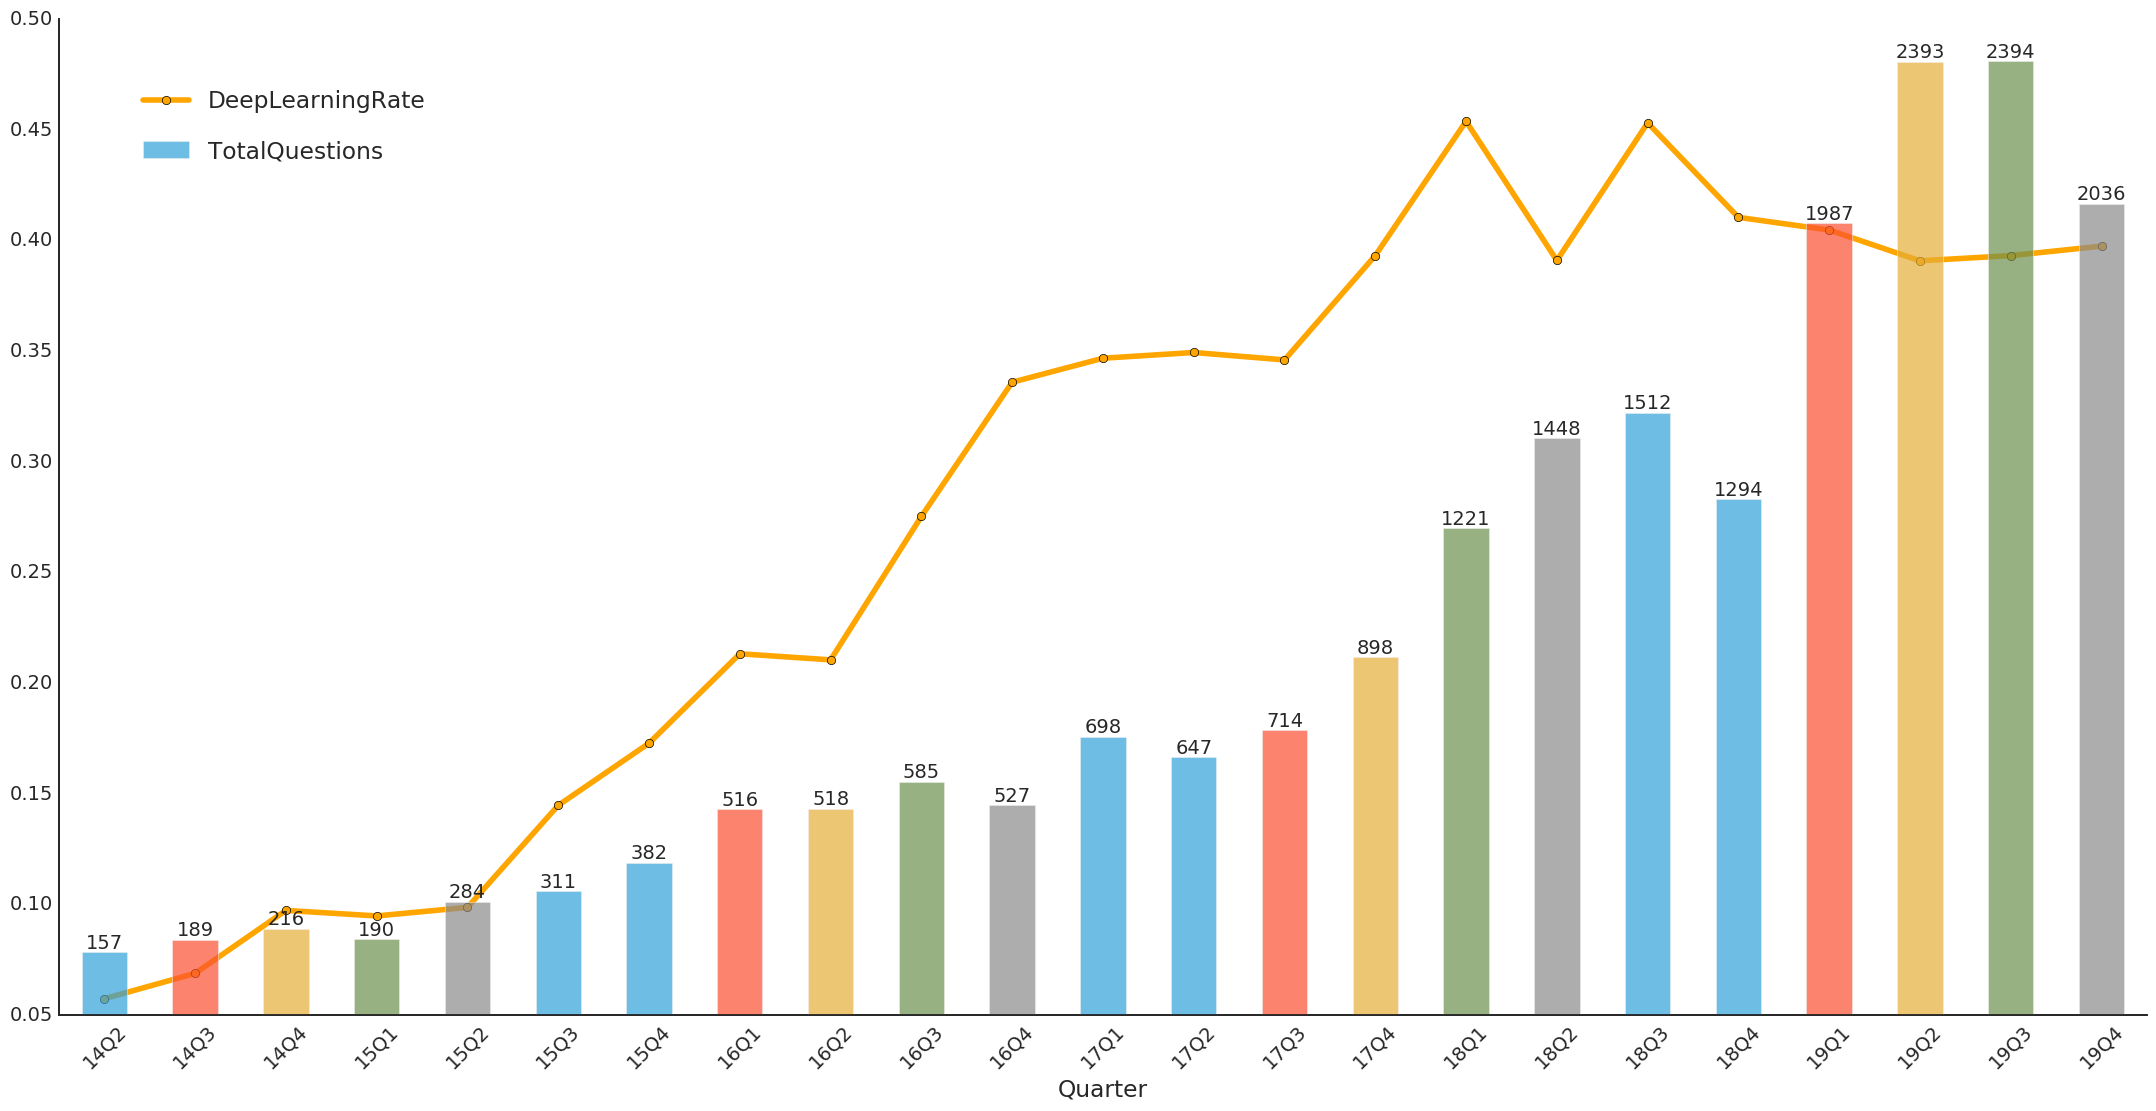

In [67]:
plt.style.use('seaborn-white')

ax1 = quarterly_group.plot(x='Quarter',y='DeepLearningRate',color='orange'
                    ,marker='o', figsize=(24,12),)

ax2= quarterly_group.plot(x='Quarter',y='TotalQuestions', kind='bar',
                         ax=ax1,rot=45,secondary_y=True,alpha=0.7)

for n, item in enumerate(quarterly_group['TotalQuestions']):
    ax2.text(n,item,str(item),va='bottom',ha='center')
    
ax1.legend(loc='upper left',bbox_to_anchor=(.03,.95))
ax2.legend(loc='upper left', bbox_to_anchor=(.03,.9))

for ax in [ax1,ax2]:
    for loc in ['right','top']:
        ax.spines[loc].set_visible(False)
        ax.tick_params(right=False,labelright = False)
        
plt.show()

From observing the above visualization, it appears that deep learning is quite popular in the years prior to 2020. However this popularity of deep learning seems to be plateauing. This should be monitured further in the year 2020.
For now, it is still recommended that deep learning content be produced.